In [1]:
import pytorch_lightning as pl

In [2]:
import torch
from torchvision import transforms

In [3]:
from dataset import *

In [50]:

args = {
    "experiment_name":"iresnet50-ArcFace",
    "project_name":"dp",

    "backbone":"iresnet50",
    "backbone_args":{"in_channels" : 1, "num_classes" : 512, "dropout_prob0" : 0.5}, 
    "metric":"ArcFaceDecoder", 
    "metric_args":{"in_features" : 512, "out_features" : 200},
    "loss":"CrossEntropy",

    "datasets" : [
        "../../Datasets/train_iris_nd_crosssensor_2013", 
        "../../Datasets/train_iris_casia_v4",
        "../../Datasets/train_iris_nd_0405",
        "../../Datasets/train_iris_utris_v1"
    ],
    "predic_dataset" : "../../Datasets/iris_verification_NDCSI2013_01_05",
    "train_transform" : {
        "Resize" : {"size":[112,112]},
        "RandomInvert" : {"p":0.2},
        "Normalize" : {"mean":[0.485], "std":[0.229]},
        "RandomAdjustSharpness"  : {"sharpness_factor":3,"p":0.5},
        "RandomAutocontrast" : {"p":0.5},
        "RandomAffine": {
            "degrees":8, 
            "translate":[0.1, 0.1],
            "scale":[0.8, 1.33],
            "shear":10,
            "fill":0
        },
        "RandomErasing":{
            "p":0.5, 
            "scale":[0.02, 0.33],
            "ratio":[0.3, 3.3],
            "value":0, 
            "inplace":False
        }
    },
    "val_transform" : {
        "Resize" : {"size":[112,112]},
        "Normalize" : {"mean":[0.485], "std":[0.229]},
    },
    "test_transform" : {
        "Resize" : {"size":[112,112]},
        "Normalize" : {"mean":[0.485], "std":[0.229]},
    },
    "predict_transform" : {
        "Resize" : {"size":[112,112]},
        "Normalize" : {"mean":[0.485], "std":[0.229]},
    }
}

In [51]:
#train transforms
train_transform = transforms.Compose([
    transforms.Resize(**args["train_transform"]["Resize"]),
    transforms.PILToTensor(),
    transforms.ConvertImageDtype(torch.float),
    transforms.RandomInvert(**args["train_transform"]["RandomInvert"]),
    transforms.Normalize(**args["train_transform"]["Normalize"]),
    transforms.RandomAdjustSharpness(
        **args["train_transform"]["RandomAdjustSharpness"]
    ),
    transforms.RandomAutocontrast(
        **args["train_transform"]["RandomAutocontrast"]
    ),
    transforms.RandomAffine(**args["train_transform"]["RandomAffine"]),
    transforms.RandomErasing(**args["train_transform"]["RandomErasing"]),
])
#val transforms
val_transform=transforms.Compose([
    transforms.Resize(**args["val_transform"]["Resize"]),
    transforms.PILToTensor(),
    transforms.ConvertImageDtype(torch.float),
    transforms.Normalize(**args["val_transform"]["Normalize"]),
])
#test transforms
test_transform=transforms.Compose([
    transforms.Resize(**args["test_transform"]["Resize"]),
    transforms.PILToTensor(),
    transforms.ConvertImageDtype(torch.float),
    transforms.Normalize(**args["test_transform"]["Normalize"]),
])
#predict transforms 
predict_transform=transforms.Compose([
    transforms.Resize(**args["predict_transform"]["Resize"]),
    transforms.PILToTensor(),
    transforms.ConvertImageDtype(torch.float),
    transforms.Normalize(**args["predict_transform"]["Normalize"]),
])

In [52]:
# data
data_loader = IrisDataModule(
    data_dir= args["datasets"],
    predic_data_dir=args["predic_dataset"],
    train_transform=train_transform,
    val_transform=val_transform,
    test_transform=test_transform,
    predict_transform=predict_transform
)

In [53]:
data_loader.setup()

In [64]:
data_loader.iris_full.num_classes

3218

In [54]:
dl = data_loader.train_dataloader()

In [55]:
input=None
target=None
for x,y in dl:
    input=x
    target=y
    break

In [67]:
target.max()

tensor(3051)

In [57]:
import matplotlib.pyplot as plt

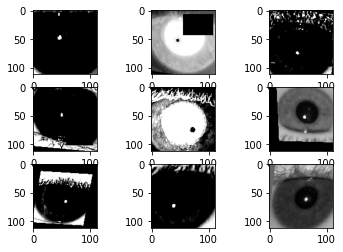

In [58]:
for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    ax.imshow(input[i][0],cmap='gray')

In [59]:
import yaml

In [60]:
with open('args.yaml', 'w') as f:
    yaml.dump(args, f)

In [61]:
import json

In [63]:
with open('args.json', 'w') as f:
    json.dump(args, f, indent=4)